In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")

print("Path to dataset files:", path)

100%|██████████| 11.2k/11.2k [00:00<00:00, 18.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mohammadtalib786/retail-sales-dataset/versions/1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import seaborn as sns
import os
os.listdir(path)

['retail_sales_dataset.csv']

In [6]:
# STEP 1: Loading the dataset
file_path = os.path.join(path, "retail_sales_dataset.csv")
df = pd.read_csv(file_path)

# Preview the data
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


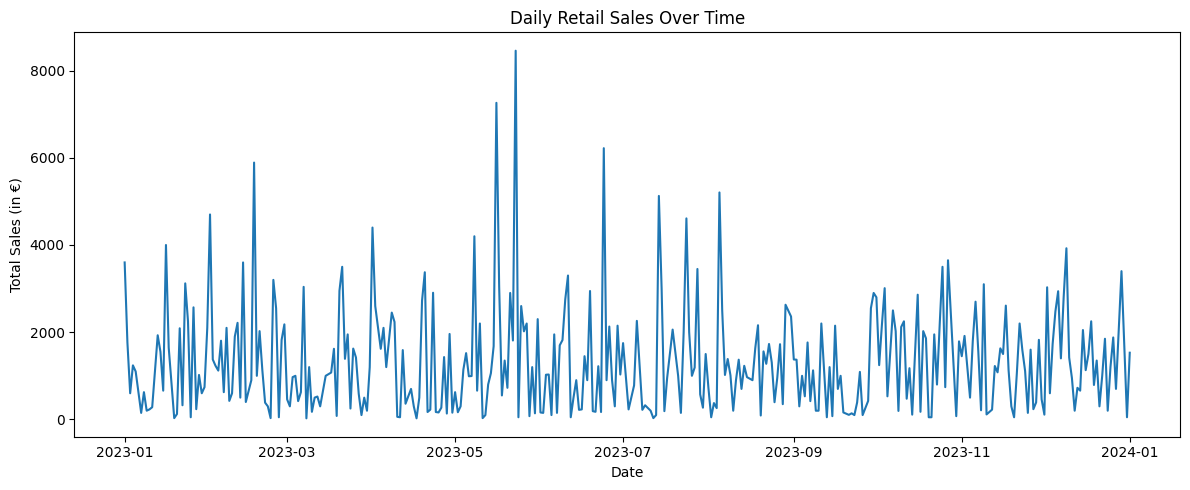

In [11]:
# STEP 2: Preprocess the data

# Converting the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Grouping by date (if multiple rows per date)
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()

# Setting date as index
daily_sales.set_index('Date', inplace=True)

# Plotting daily sales
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_sales, x=daily_sales.index, y='Total Amount')
plt.title("Daily Retail Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (in €)")
plt.tight_layout()
plt.show()

In [12]:
# STEP 3: Building and Fitting ARIMA Model
# Use sales series
sales_series = daily_sales['Total Amount']

# Optional: Split into train/test
train = sales_series[:int(0.8 * len(sales_series))]
test = sales_series[int(0.8 * len(sales_series)):]

# Fit ARIMA model (adjust order based on AIC/BIC later)
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next N days (length of test set)
forecast = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

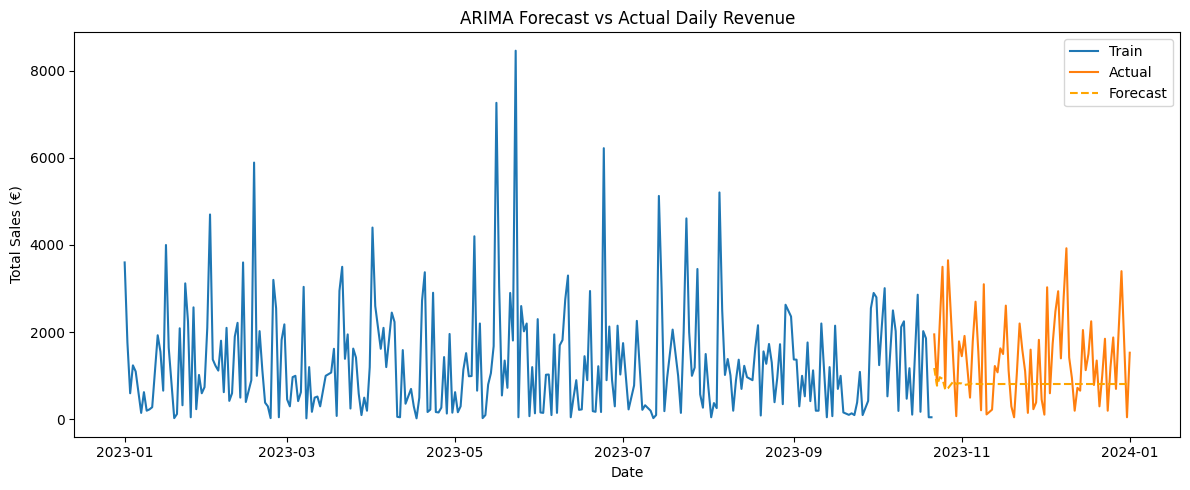

In [13]:
#STEP 4: Plotting the forecast vs Actual
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--', color='orange')
plt.title("ARIMA Forecast vs Actual Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Total Sales (€)")
plt.legend()
plt.tight_layout()
plt.show()